In [67]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="darkgrid")
mpl.rcParams['lines.linewidth'] = 3
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.greedy=True
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from IPython.core.display import HTML; HTML(open("custom.html", "r").read())

# Chapter 8: Introduction to Neural Networks



<img src="https://i.imgflip.com/3042en.jpg" title="made at imgflip.com" width=35%/>


## TO DO: Almost all the figues and schematics will be replaced or improved slowly

<center>
<figure>
<img src="./images/neuralnets/neural_net_ex.svg" width="50%"/>
<figcaption>A 3 layer Neural Network (By convention the input layer is not counted).</figcaption>
</figure>
</center>

## History of Neural networks


1943 - Threshold Logic

1940s - Hebbian Learning

1958 - Perceptron

1980s - Neocognitron

1982 - Hopfield Network

1989 - Convolutional neural network (CNN) kernels trained via backpropagation

1997 - Long-short term memory (LSTM) model

1998 - LeNet-5

2014 - Gated Recurrent Units (GRU), Generative Adversarial Networks (GAN)

2015 - ResNet

## Why the boom now?
* Data
* Data
* Data
* Availability of GPUs
* Algorithmic developments which allow for efficient training and making networks networks
* Development of high-level libraries/APIs have made the field much more accessible than it was a decade ago

## Feed-Forward neural network
<center>
<figure>
<img src="./images/neuralnets/neural_net_ex.svg" width="700"/>
<figcaption>A 3 layer densely connected Neural Network (By convention the input layer is not counted).</figcaption>
</figure>
</center>

## Building blocks
### Perceptron

The smallest unit of a neural network is a **perceptron** like node.

**What is a Perceptron?**

It is a simple function which can have multiple inputs and has a single output.

<center>
<figure>
<img src="./images/neuralnets/perceptron_ex.svg" width="400"/>
<figcaption>A simple perceptron with 3 inputs and 1 output.</figcaption>
</figure>
</center>


It works as follows: 

Step 1: A **weighted sum** of the inputs is calculated

\begin{equation*}
weighted\_sum = w_{1} x_{1} + w_{2} x_{2} + w_{3} x_{3} + ...
\end{equation*}

Step 2: A **step** activation function is applied

$$
f = \left\{
        \begin{array}{ll}
            0 & \quad weighted\_sum < threshold \\
            1 & \quad weighted\_sum \geq threshold
        \end{array}
    \right.
$$

You can see that this is also a linear classifier as the ones we introduced in script 02.

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

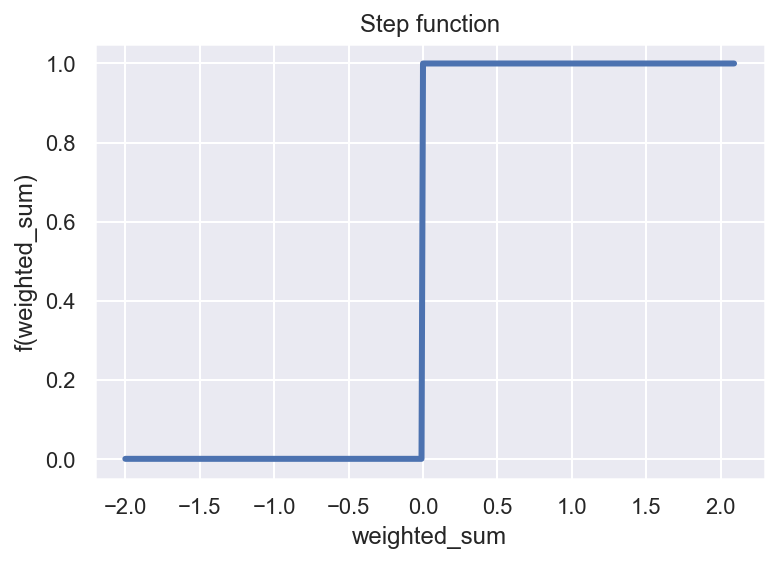

In [69]:
# Plotting the step function
x = np.arange(-2,2.1,0.01)
y = np.zeros(len(x))
threshold = 0.
y[x>threshold] = 1.
step_plot = sns.lineplot(x, y).set_title('Step function') ;
plt.xlabel('weighted_sum') ;
plt.ylabel('f(weighted_sum)') ;

In [70]:
def perceptron(X, w, threshold=1):
    # This function computes sum(w_i*x_i) and
    # applies a perceptron activation
    linear_sum = np.dot(np.asarray(X).T, w)
    output = np.zeros(len(linear_sum), dtype=np.int8)
    output[linear_sum >= threshold] = 1
    return output

#### Boolean AND

| x$_1$ | x$_2$ | output |
| --- | --- | --- |
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |

In [71]:
# Calculating Boolean AND using a perceptron
threshold = 1.5
# (w1, w2)
w = [1, 1]
# (x1, x2) pairs
x1 = [0, 1, 0, 1]
x2 = [0, 0, 1, 1]
# Calling the perceptron function
output = perceptron([x1, x2], w, threshold)
for i in range(len(output)):
    print("Perceptron output for x1, x2 = ", x1[i], ",", x2[i],
          " is ", output[i])

Perceptron output for x1, x2 =  0 , 0  is  0
Perceptron output for x1, x2 =  1 , 0  is  0
Perceptron output for x1, x2 =  0 , 1  is  0
Perceptron output for x1, x2 =  1 , 1  is  1


In this simple case we can rewrite our equation to $x_2 = ...... $ which describes a line in 2D:

In [72]:
def perceptron_DB(x1, x2, w, threshold):
    # Plotting the decision boundary of the perceptron
    plt.scatter(x1, x2, color="black")
    plt.xlim(-1,2)
    plt.ylim(-1,2)
    # The decision boundary is a line given by
    # w_1*x_1+w_2*x_2-threshold=0
    x1 = np.arange(-3, 4)
    x2 = (threshold - x1*w[0])/w[1]
    sns.lineplot(x1, x2, **{"color": "black"})
    plt.xlabel("x$_1$", fontsize=16)
    plt.ylabel("x$_2$", fontsize=16)
    # Coloring the regions
    pts_tmp = np.arange(-2, 2.1, 0.02)
    points = np.array(np.meshgrid(pts_tmp, pts_tmp)).T.reshape(-1, 2)
    outputs = perceptron(points.T, w, threshold)
    plt.plot(points[:, 0][outputs == 0], points[:, 1][outputs == 0],
             "o",
             color="steelblue",
             markersize=1,
             alpha=0.04,
             )
    plt.plot(points[:, 0][outputs == 1], points[:, 1][outputs == 1],
             "o",
             color="chocolate",
             markersize=1,
             alpha=0.04,
             )
    plt.title("Blue color = 0 and Chocolate = 1")

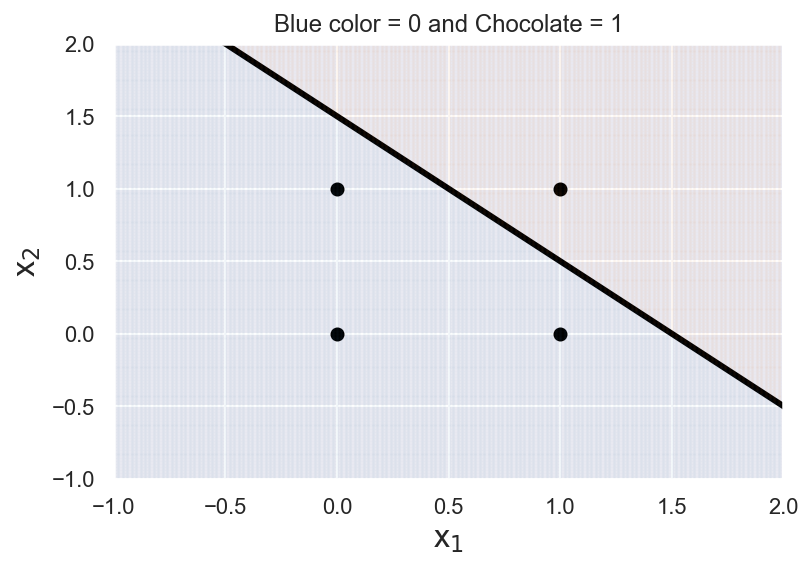

In [73]:
# Plotting the perceptron decision boundary
perceptron_DB(x1, x2, w, threshold)

### Exercise section
* Compute a Boolean "OR" using a perceptron

Hint: copy the code from the "AND" example and edit the weights and/or threshold

#### Boolean OR

| x$_1$ | x$_2$ | output |
| --- | --- | --- |
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 1 |

In [74]:
# Calculating Boolean OR using a perceptron
# Enter code here

Perceptron output for x1, x2 =  0 , 0  is  0
Perceptron output for x1, x2 =  1 , 0  is  1
Perceptron output for x1, x2 =  0 , 1  is  1
Perceptron output for x1, x2 =  1 , 1  is  1


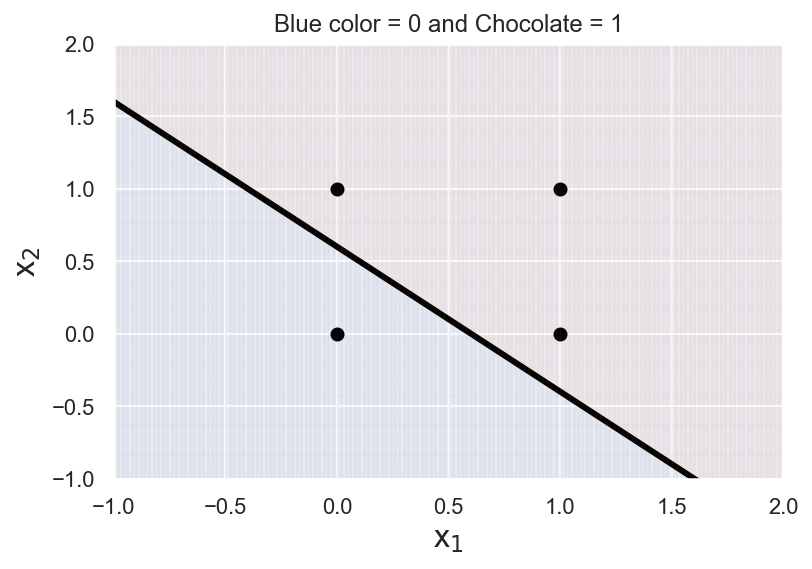

In [75]:
# Solution
# Calculating Boolean OR using a perceptron
threshold=0.6
# (w1, w2)
w=[1,1]
# (x1, x2) pairs
x1 = [0, 1, 0, 1]
x2 = [0, 0, 1, 1]
output = perceptron([x1, x2], w, threshold)
for i in range(len(output)):
    print("Perceptron output for x1, x2 = ", x1[i], ",", x2[i],
          " is ", output[i])
perceptron_DB(x1, x2, w, threshold)

### Exercise section
* Create a NAND gate using a perceptron

#### Boolean NAND

| x$_1$ | x$_2$ | output |
| --- | --- | --- |
| 0 | 0 | 1 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

In [76]:
# Calculating Boolean NAND using a perceptron
# Enter code here

Perceptron output for x1, x2 =  0 , 0  is  1
Perceptron output for x1, x2 =  1 , 0  is  1
Perceptron output for x1, x2 =  0 , 1  is  1
Perceptron output for x1, x2 =  1 , 1  is  0


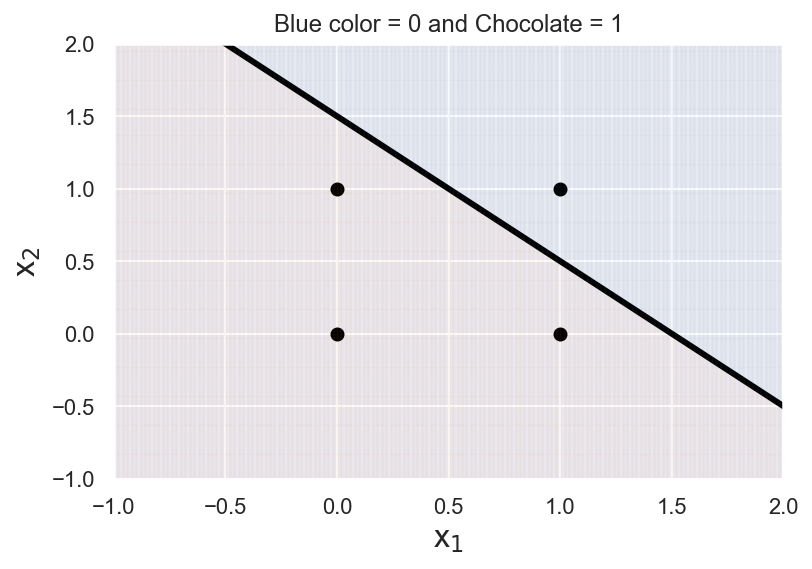

In [77]:
# Solution
# Calculating Boolean NAND using a perceptron
import matplotlib.pyplot as plt
threshold=-1.5
# (w1, w2)
w=[-1,-1]
# (x1, x2) pairs
x1 = [0, 1, 0, 1]
x2 = [0, 0, 1, 1]
output = perceptron([x1, x2], w, threshold)
for i in range(len(output)):
    print("Perceptron output for x1, x2 = ", x1[i], ",", x2[i],
          " is ", output[i])
perceptron_DB(x1, x2, w, threshold)

In fact, a single perceptron can compute "AND", "OR" and "NOT" boolean functions.

However, it cannot compute some other boolean functions such as "XOR".

**WHAT CAN WE DO?**


Hint: Think about what is the significance of the NAND gate we have created above?

Answer: We said a single perceptron can't compute a "XOR" function. We didn't say that about **multiple Perceptrons** put together.

**XOR function using multiple perceptrons**

<center>
<figure>
<img src="./images/neuralnets/perceptron_XOR.svg" width="400"/>
<figcaption>Multiple perceptrons connected together to output a XOR function.</figcaption>
</figure>
</center>

### Multi-layer perceptrons

The normal densely connected neural network is sometimes also called "Multi-layer" perceptron.

## Learning

We know that we can compute complicated functions by combining a number of perceptrons.

In the perceptron examples we had set the model parameters (weights and threshold) by hand.

This is something we definitely **DO NOT** want to do or even can do for big networks.

We want some algorithm to set/learn the model parameters for us!

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>Threshold -> bias</strong>  
    
Before we go further we need to introduce one change. The threshold which we saw in the step activation function above is moved to the left side of the equation and is called **bias**.

$$
f = \left\{
        \begin{array}{ll}
            0 & \quad weighted\_sum + bias < 0 \\
            1 & \quad weighted\_sum + bias \geq 0
        \end{array}
       \quad \quad  \mathrm{where}, bias = -threshold
    \right.
$$

</div>

In order to algorithmically set/learn the weights and bias we need to choose an appropriate loss function for the problem at hand and solve an optimization problem.
We will explain below what this means.


### Loss function

To learn using an algorithm we need to define a quantity/function which allows us to measure how close or far are the predictions of our network/setup from reality or the supplied labels. This is done by choosing a so-called "Loss function" (as in the case for other machine learning algorithms).

Once we have this function, we need an algorithm to update the weights of the network such that this loss function decreases. 
As one can already imagine the choice of an appropriate loss function is critical to the success of the model. 

Fortunately, for classification and regression (which cover a large variety of problems) these loss functions are well known. 

Generally **crossentropy** and **mean squared error** loss functions are used for classification and regression problems, respectively.

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; As we have seen before, <strong>mean squared error</strong> is defined as 


$$
\frac{1}{n} \left((y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + ... + (y_n - \hat{y}_n)^2 \right)
$$


</div>

### Gradient based learning

As mentioned above, once we have chosen a loss function, we want to solve an **optimization problem** which minimizes this loss by updating the parameters (weights and biases) of the network. This is how the learning takes in a NN, and the "knowledge" is stored as the weights and biases.

The most popular optimization methods used in Neural Network training are **Gradient-descent (GD)** type methods, such as gradient-descent itself, RMSprop and Adam. 

**Gradient-descent** uses partial derivatives of the loss function with respect to the network weights and a learning rate to updates the weights such that the loss function decreases and after some iterations reaches its (Global) minimum value.

First, the loss function and its derivative are computed at the output node, and this signal is propagated backwards, using the chain rule, in the network to compute the partial derivatives. Hence, this method is called **Backpropagation**.

One way to perform a single GD pass is to compute the partial derivatives using **all the samples** in our data, computing average derivatives and using them to update the weights. This is called **Batch gradient descent**. However, in deep learning we mostly work with massive datasets and using batch gradient descent can make the training very slow!

The other extreme is to randomly shuffle the dataset and advance a pass of GD with the gradients computed using only **one sample** at a time. This is called **Stochastic gradient descent**.

<center>
<figure>
<img src="stochastic-vs-batch-gradient-descent.png" width="600"/>
<figcaption>Source: <a href="https://wikidocs.net/3413">https://wikidocs.net/3413</a></figcaption>
</figure>
</center>


In practice, an approach in-between these two is used. The entire dataset is divided into **m batches** and these are used one by one to compute the derivatives and apply GD. This technique is called **Mini-batch gradient descent**. 

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
One pass through the entire training dataset is called 1 epoch of training.
</p>
</div>

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 4)) ;

pts=np.arange(-20,20, 0.1) ;

<Figure size 720x288 with 0 Axes>

### Activation Functions

In order to train the network we need to move away from Perceptron's **step** activation function because it can not be used for training using the gradient-descent and back-propagation algorithms among other drawbacks.

Non-Linear functions such as:

* Sigmoid

\begin{equation*}
f(z) = \frac{1}{1+e^{-z}} \quad \quad \mathrm{where}, z = weighted\_sum + bias
\end{equation*}

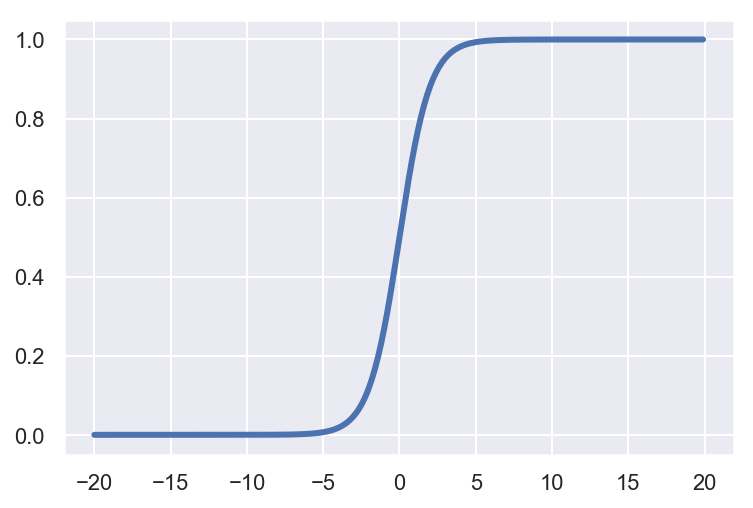

In [79]:
sns.lineplot(pts, 1/(1+np.exp(-pts))) ;

* tanh

\begin{equation*}
f(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}\quad \quad \mathrm{where}, z = weighted\_sum + bias
\end{equation*}


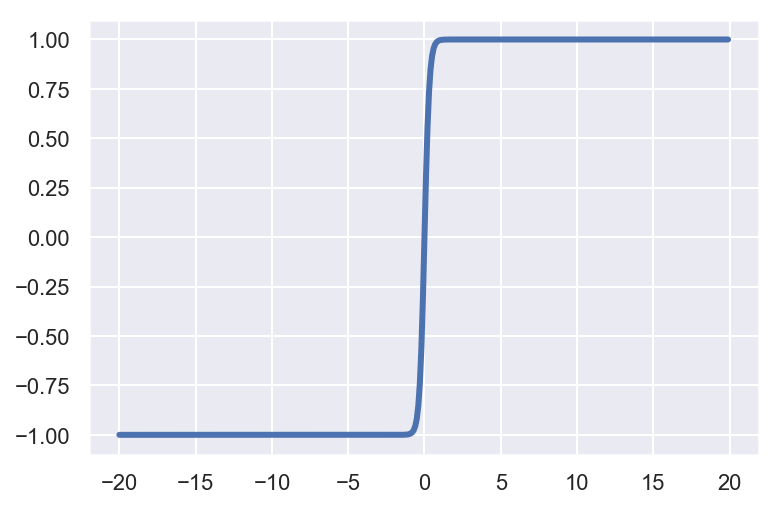

In [80]:
sns.lineplot(pts, np.tanh(pts*np.pi)) ;

* **ReLU (Rectified linear unit)**

\begin{equation*}
f(z) = \mathrm{max}(0,z)   \quad \quad \mathrm{where}, z = weighted\_sum + bias
\end{equation*}

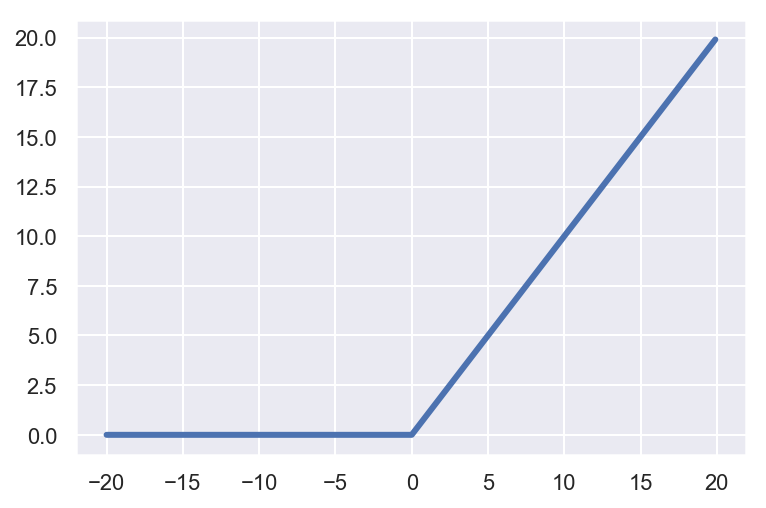

In [81]:
pts_relu=[max(0,i) for i in pts];
plt.plot(pts, pts_relu) ;

are some of the commonly used as activation functions. Such non-linear activation functions allow the network to learn complex representations of data.

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
ReLU is very popular and is widely used nowadays. There also exist other variations of ReLU, e.g. "leaky ReLU".
</p>
</div>

<div class="alert alert-block alert-info">
<p><i class="fa fa-warning"></i>&nbsp;
Why don't we just use a simple linear activation function?
    
Linear activations are **NOT** used because it can be mathematically shown that if they are used then the output is just a linear function of the input. So we cannot learn interesting and complex functions by adding any number of hidden layers.

The only exception when we do want to use a linear activation is for the output layer of a network when solving a regression problem.

</p>
</div>

### Exercise section

### Google Playground

A great tool from Google to develop a feeling for the workings of neural networks.

https://playground.tensorflow.org/

<img src="./images/neuralnets/google_playground.png"/>

**Walkthrough by instructor**

Some concepts to look at:

* Simple vs Complex models (Effect of network size)
* Optimization results
* Effect of activation functions

# Introduction to Keras

### What is Keras?

* It is a high level API to create and work with neural networks
* Supports multiple backends such as **TensorFlow** from Google, **Theano** (Although Theano is dead now) and **CNTK** (Microsoft Cognitive Toolkit)
* Very good for creating neural nets quickly and hides away a lot of tedious work
* Has been incorporated into official TensorFlow (which obviously only works with tensforflow) and as of TensorFlow 2.0 this will the main api to use it


<center>
<figure>
<img src="./images/neuralnets/neural_net_keras_1.svg" width="700"/>
<figcaption>Building this model in Keras</figcaption>
</figure>
</center>

In [82]:
# Say hello to keras
from keras.models import Sequential
from keras.layers import Dense, Activation

# Creating a model
model = Sequential()

# Adding layers to this model
# 1st Hidden layer
# A Dense/fully-connected layer which takes as input a 
# feature array of shape (samples, num_features)
# Here input_shape = (2,) means that the layer expects an input with num_features = 2
# and the sample size could be anything
# The activation function for this layer is set to "relu"
model.add(Dense(units=4, input_shape=(2,), activation="relu"))

# 2nd Hidden layer
# This is also a fully-connected layer and we do not need to specify the
# shape of the input anymore (We need to do that only for the first layer)
# NOTE: Now we didn't add the activation seperately. Instead we just added it
# while calling Dense(). This and the way used for the first layer are Equivalent!
model.add(Dense(units=4, activation="relu"))

          
# The output layer
model.add(Dense(units=1))
model.add(Activation("sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_155 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 5         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


### XOR using neural networks

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

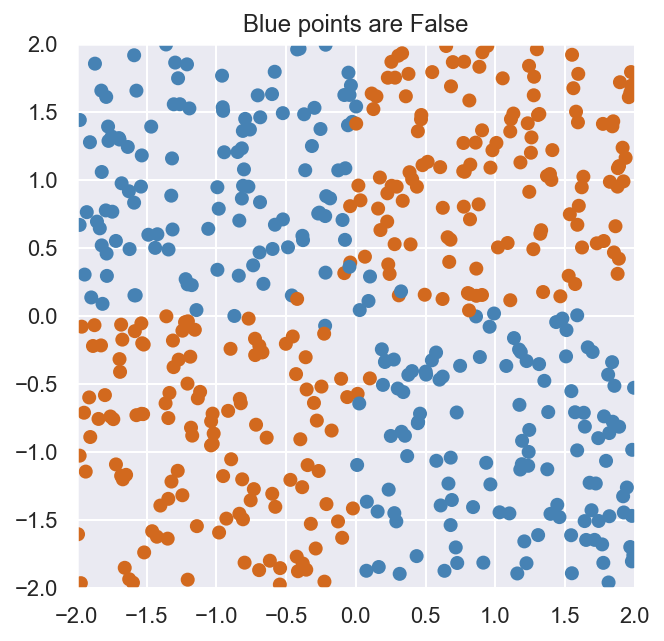

In [84]:
# Creating a network to solve the XOR problem

# Loading and plotting the data
xor = pd.read_csv("xor.csv")

# Using x and y coordinates as featues
features = xor.iloc[:, :-1]
# Convert boolean to integer values (True->1 and False->0)
labels = xor.iloc[:, -1].astype(int)

colors = [["steelblue", "chocolate"][i] for i in xor["label"]]
plt.figure(figsize=(5, 5))
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title("Blue points are False")
plt.scatter(features["x"], features["y"], color=colors, marker="o") ;

In [85]:
# Building a simple Keras model

def a_simple_NN():
    
    model = Sequential()

    model.add(Dense(4, input_shape = (2,), activation = "relu"))

    model.add(Dense(4, activation = "relu"))

    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    
    return model

In [86]:
# Instantiating the model
model = a_simple_NN()

# Splitting the dataset into training (70%) and validation sets (30%)
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3)

# Setting the number of passes through the entire training set
num_epochs = 300

# model.fit() is used to train the model
# We can pass validation data while training
model_run = model.fit(X_train, y_train, epochs=num_epochs,
                      validation_data=(X_test, y_test))

Train on 350 samples, validate on 150 samples
Epoch 1/300
350/350 [==============================] - 4s 10ms/step - loss: 0.7117 - acc: 0.5343 - val_loss: 0.7110 - val_acc: 0.5667
Epoch 2/300
350/350 [==============================] - 0s 313us/step - loss: 0.7049 - acc: 0.5400 - val_loss: 0.7072 - val_acc: 0.5600
Epoch 3/300
350/350 [==============================] - 0s 188us/step - loss: 0.6996 - acc: 0.5400 - val_loss: 0.7035 - val_acc: 0.5600
Epoch 4/300
350/350 [==============================] - 0s 126us/step - loss: 0.6946 - acc: 0.5400 - val_loss: 0.6996 - val_acc: 0.5600
Epoch 5/300
350/350 [==============================] - 0s 139us/step - loss: 0.6895 - acc: 0.5486 - val_loss: 0.6955 - val_acc: 0.5600
Epoch 6/300
350/350 [==============================] - 0s 127us/step - loss: 0.6845 - acc: 0.5486 - val_loss: 0.6909 - val_acc: 0.5600
Epoch 7/300
350/350 [==============================] - 0s 128us/step - loss: 0.6790 - acc: 0.5543 - val_loss: 0.6858 - val_acc: 0.5667
Epoch 8/30

Epoch 61/300
350/350 [==============================] - 0s 115us/step - loss: 0.5748 - acc: 0.6886 - val_loss: 0.5855 - val_acc: 0.7133
Epoch 62/300
350/350 [==============================] - 0s 94us/step - loss: 0.5734 - acc: 0.6914 - val_loss: 0.5841 - val_acc: 0.7133
Epoch 63/300
350/350 [==============================] - 0s 93us/step - loss: 0.5720 - acc: 0.6914 - val_loss: 0.5827 - val_acc: 0.7133
Epoch 64/300
350/350 [==============================] - 0s 131us/step - loss: 0.5707 - acc: 0.6943 - val_loss: 0.5813 - val_acc: 0.7133
Epoch 65/300
350/350 [==============================] - 0s 107us/step - loss: 0.5693 - acc: 0.6914 - val_loss: 0.5800 - val_acc: 0.7133
Epoch 66/300
350/350 [==============================] - 0s 116us/step - loss: 0.5681 - acc: 0.6943 - val_loss: 0.5787 - val_acc: 0.7133
Epoch 67/300
350/350 [==============================] - 0s 109us/step - loss: 0.5668 - acc: 0.6971 - val_loss: 0.5774 - val_acc: 0.7133
Epoch 68/300
350/350 [============================

350/350 [==============================] - 0s 107us/step - loss: 0.5039 - acc: 0.7343 - val_loss: 0.5209 - val_acc: 0.7467
Epoch 122/300
350/350 [==============================] - 0s 109us/step - loss: 0.5025 - acc: 0.7371 - val_loss: 0.5197 - val_acc: 0.7467
Epoch 123/300
350/350 [==============================] - 0s 108us/step - loss: 0.5007 - acc: 0.7343 - val_loss: 0.5185 - val_acc: 0.7467
Epoch 124/300
350/350 [==============================] - 0s 130us/step - loss: 0.4990 - acc: 0.7343 - val_loss: 0.5174 - val_acc: 0.7467
Epoch 125/300
350/350 [==============================] - 0s 143us/step - loss: 0.4974 - acc: 0.7371 - val_loss: 0.5163 - val_acc: 0.7467
Epoch 126/300
350/350 [==============================] - 0s 113us/step - loss: 0.4957 - acc: 0.7400 - val_loss: 0.5153 - val_acc: 0.7467
Epoch 127/300
350/350 [==============================] - 0s 132us/step - loss: 0.4943 - acc: 0.7400 - val_loss: 0.5143 - val_acc: 0.7533
Epoch 128/300
350/350 [==============================] 

Epoch 181/300
350/350 [==============================] - 0s 128us/step - loss: 0.4294 - acc: 0.7429 - val_loss: 0.4672 - val_acc: 0.7533
Epoch 182/300
350/350 [==============================] - 0s 115us/step - loss: 0.4285 - acc: 0.7429 - val_loss: 0.4662 - val_acc: 0.7533
Epoch 183/300
350/350 [==============================] - 0s 148us/step - loss: 0.4274 - acc: 0.7457 - val_loss: 0.4654 - val_acc: 0.7533
Epoch 184/300
350/350 [==============================] - 0s 143us/step - loss: 0.4266 - acc: 0.7457 - val_loss: 0.4644 - val_acc: 0.7533
Epoch 185/300
350/350 [==============================] - 0s 151us/step - loss: 0.4254 - acc: 0.7429 - val_loss: 0.4630 - val_acc: 0.7533
Epoch 186/300
350/350 [==============================] - 0s 157us/step - loss: 0.4245 - acc: 0.7457 - val_loss: 0.4620 - val_acc: 0.7533
Epoch 187/300
350/350 [==============================] - 0s 144us/step - loss: 0.4235 - acc: 0.7429 - val_loss: 0.4609 - val_acc: 0.7533
Epoch 188/300
350/350 [==================

Epoch 241/300
350/350 [==============================] - 0s 135us/step - loss: 0.3923 - acc: 0.7457 - val_loss: 0.4298 - val_acc: 0.7533
Epoch 242/300
350/350 [==============================] - 0s 110us/step - loss: 0.3920 - acc: 0.7457 - val_loss: 0.4296 - val_acc: 0.7533
Epoch 243/300
350/350 [==============================] - 0s 149us/step - loss: 0.3921 - acc: 0.7486 - val_loss: 0.4291 - val_acc: 0.7533
Epoch 244/300
350/350 [==============================] - 0s 136us/step - loss: 0.3916 - acc: 0.7457 - val_loss: 0.4288 - val_acc: 0.7533
Epoch 245/300
350/350 [==============================] - 0s 119us/step - loss: 0.3912 - acc: 0.7457 - val_loss: 0.4285 - val_acc: 0.7533
Epoch 246/300
350/350 [==============================] - 0s 115us/step - loss: 0.3910 - acc: 0.7457 - val_loss: 0.4281 - val_acc: 0.7533
Epoch 247/300
350/350 [==============================] - 0s 131us/step - loss: 0.3907 - acc: 0.7457 - val_loss: 0.4277 - val_acc: 0.7533
Epoch 248/300
350/350 [==================

<div class="alert alert-block alert-info"><p><i class="fa fa-info-circle"></i>&nbsp;
    NOTE: We can pass "verbose=0" to model.fit() to suppress the printing of model output on the terminal/notebook.
</p></div>

The history has the following data:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


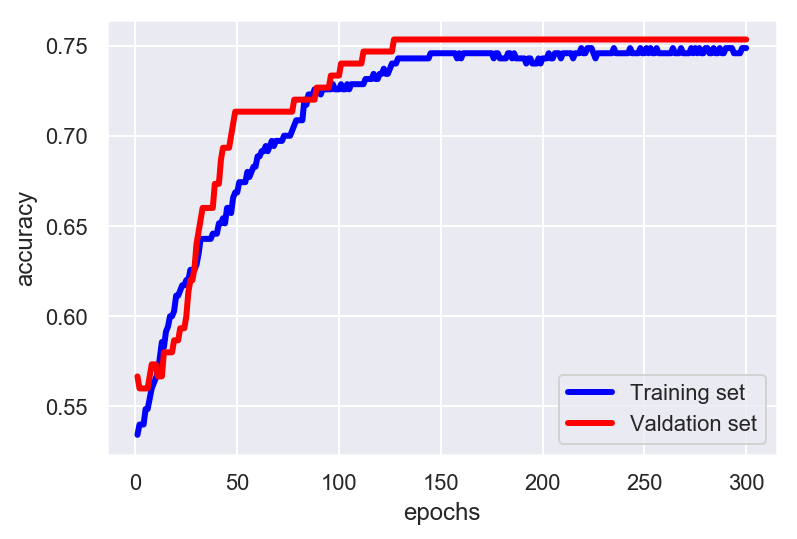

In [87]:
# Plotting the loss and accuracy on the training and validation sets during the training
# This can be done by using Keras callback "history" which is applied by default
history_model = model_run.history

print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(np.arange(1, num_epochs+1), history_model["acc"], color = "blue", label="Training set") ;
sns.lineplot(np.arange(1, num_epochs+1), history_model["val_acc"], color = "red", label="Valdation set") ;
plt.xlabel("epochs") ;
plt.ylabel("accuracy") ;

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
The plots such as above are essential for analyzing the behaviour and performance of the network and to tune it in the right direction. However, for the example above we don't expect to derive a lot of insight from this plot as the function we are trying to fit is quite simple and there is not too much noise. We will see the significance of these curves in a later example.
</p>
</div>

In [88]:
# Before we move on forward we see how to save and load a keras model
model.save("./my_first_NN.h5")

# Optional: See what is in the hdf5 file we just created above

from keras.models import load_model
model = load_model("./my_first_NN.h5")

For the training and validation in the example above we split our dataset into a 70-30 train-validation set. We know from previous chapters that to more robustly estimate the accuracy of our model we can use **K-fold cross-validation**.
This is even more important when we have small datasets and cannot afford to reserve a validation set!

One way to do the cross-validation here would be to write our own function to do this. However, we also know that **scikit-learn** provides several handy functions to evaluate and tune the models. So the question is:


<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
    Can we somehow use the scikit-learn functions or the ones we wrote ourselves for scikit-learn models to evaluate and tune our Keras models?


The Answer is **YES !**
</p>
</div>



We show how to do this in the following section.

## Using scikit-learn functions on keras models


<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
Keras offers 2 wrappers which allow its Sequential models to be used with scikit-learn. 

There are: **KerasClassifier** and **KerasRegressor**.

For more information:
https://keras.io/scikit-learn-api/
</p>
</div>



**Now lets see how this works!**

In [89]:
# We wrap the Keras model we created above with KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
# Wrapping Keras model
# NOTE: We pass verbose=0 to suppress the model output
num_epochs = 400
model_scikit = KerasClassifier(
    build_fn=a_simple_NN, epochs=num_epochs, verbose=0)

In [90]:
# Let's reuse the function to visualize the decision boundary which we saw in chapter 2 with minimal change

def list_flatten(list_of_list):
    flattened_list = [i for j in list_of_list for i in j]
    return flattened_list

def plot_points(plt=plt, marker='o'):
    colors = [["steelblue", "chocolate"][i] for i in labels]
    plt.scatter(features.iloc[:, 0], features.iloc[:, 1], color=colors, marker=marker);

def train_and_plot_decision_surface(
    name, classifier, features_2d, labels, preproc=None, plt=plt, marker='o', N=400
):

    features_2d = np.array(features_2d)
    xmin, ymin = features_2d.min(axis=0)
    xmax, ymax = features_2d.max(axis=0)

    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)

    if preproc is not None:
        points_for_classifier = preproc.fit_transform(points)
        features_2d = preproc.fit_transform(features_2d)
    else:
        points_for_classifier = points

    classifier.fit(features_2d, labels, verbose=0)
    predicted = classifier.predict(features_2d)
    
    if name == "Neural Net":
        predicted = list_flatten(predicted)
    
    
    if preproc is not None:
        name += " (w/ preprocessing)"
    print(name + ":\t", sum(predicted == labels), "/", len(labels), "correct")
    
    if name == "Neural Net":
        classes = np.array(list_flatten(classifier.predict(points_for_classifier)), dtype=bool)
    else:
        classes = np.array(classifier.predict(points_for_classifier), dtype=bool)
    plt.plot(
        points[~classes][:, 0],
        points[~classes][:, 1],
        "o",
        color="steelblue",
        markersize=1,
        alpha=0.01,
    )
    plt.plot(
        points[classes][:, 0],
        points[classes][:, 1],
        "o",
        color="chocolate",
        markersize=1,
        alpha=0.04,
    )

Neural Net:	 482 / 500 correct


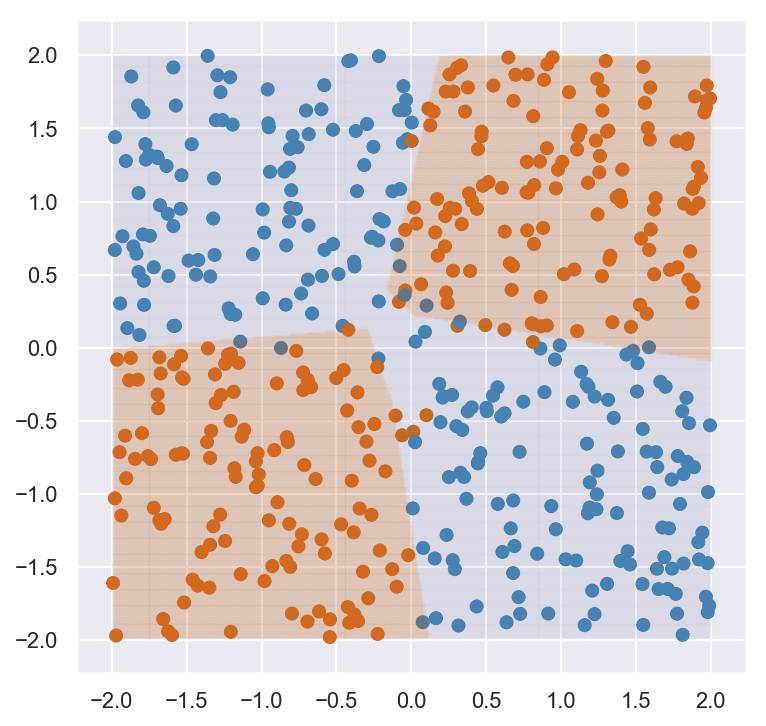

In [91]:
_, ax = plt.subplots(figsize=(6, 6))

train_and_plot_decision_surface("Neural Net", model_scikit, features, labels, plt=ax)
plot_points(plt=ax)

In [92]:
# Applying K-fold cross-validation
# Here we pass the whole dataset, i.e. features and labels, instead of splitting it.
num_folds = 5
cross_validation = cross_val_score(
    model_scikit, features, labels, cv=num_folds, verbose=0)

print("The acuracy on the ", num_folds, " validation folds:", cross_validation)
print("The Average acuracy on the ", num_folds, " validation folds:", np.mean(cross_validation))

The acuracy on the  5  validation folds: [0.97 0.96 0.95 0.99 0.96]
The Average acuracy on the  5  validation folds: 0.966


<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
The code above took quiet long to finish even though we used only 5  CV folds and the neural network and data size are very small! This gives an indication of the enormous compute requirements of training production-grade deep neural networks.
</p>
</div>

## Hyperparameter optimization

We know from chapter 6 that there are 2 types of parameters which need to be tuned for a machine learning model.
* Internal model parameters (weights) which can be learned for e.g. by gradient-descent
* Hyperparameters

In the model created above we made some arbitrary choices such as the choice of the optimizer we used, optimizer's learning rate, number of hidden units and so on ...

Now that we have the keras model wrapped as a scikit-learn model we can use the grid search functions we have seen in chapter 6.

In [93]:
from sklearn.model_selection import GridSearchCV
# Just to remember
model_scikit = KerasClassifier(
    build_fn=a_simple_NN, **{"epochs": num_epochs, "verbose": 0})

In [94]:
HP_grid = {'epochs' : [30, 50, 100]}
search = GridSearchCV(estimator=model_scikit, param_grid=HP_grid)
search.fit(features, labels)
print(search.best_score_, search.best_params_)

0.8660000003576279 {'epochs': 50}


In [95]:
HP_grid = {'epochs' : [10, 15, 30], 
           'batch_size' : [10, 20, 30] }
search = GridSearchCV(estimator=model_scikit, param_grid=HP_grid)
search.fit(features, labels)
print(search.best_score_, search.best_params_)

/Users/tarunchadha/anaconda3/envs/mlw-2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7820000060796738 {'batch_size': 20, 'epochs': 30}


In [96]:
# A more general model for further Hyperparameter optimization
from keras import optimizers

def a_simple_NN(activation='relu', num_hidden_neurons=[4, 4], learning_rate=0.01):

    model = Sequential()

    model.add(Dense(num_hidden_neurons[0],
                    input_shape=(2,), activation=activation))

    model.add(Dense(num_hidden_neurons[1], activation=activation))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=optimizers.rmsprop(
        lr=learning_rate), metrics=["accuracy"])

    return model

### Exercise section: 
* Look at the model above and choose a couple of hyperparameters to optimize. 
* **OPTIONAL:** What function from scikit-learn other than GridSearchCV can we use for hyperparameter optimization? Use it.

In [97]:
# Code here

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
Another library which you should definitely look at for doing hyperparameter optimization with keras models is the <a href="https://github.com/maxpumperla/hyperas">Hyperas library</a> which is a wrapper around the <a href="https://github.com/hyperopt/hyperopt">Hyperopt library</a>. 

</p>
</div>

### Exercise section:  
* Create a neural network to classify the 2d points example from chapter 2 learned (Optional: As you create the model read a bit on the different keras commands we have used).

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

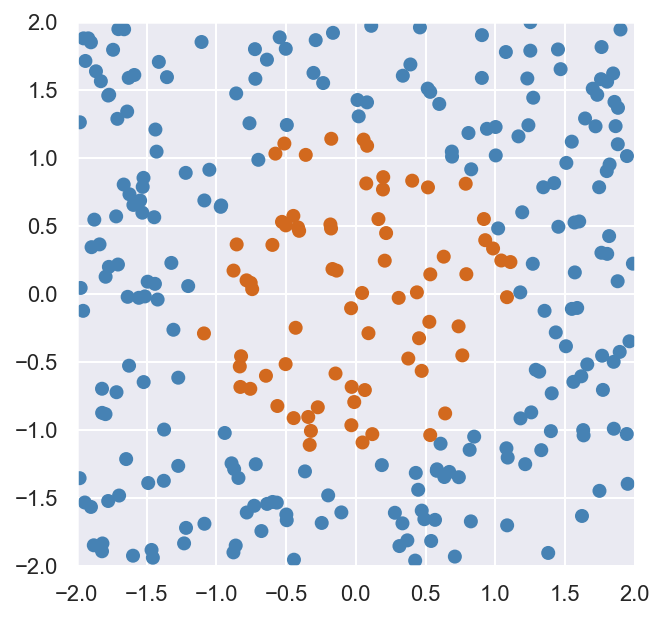

In [99]:
circle = pd.read_csv("2d_points.csv")
# Using x and y coordinates as featues
features = circle.iloc[:, :-1]
# Convert boolean to integer values (True->1 and False->0)
labels = circle.iloc[:, -1].astype(int)

colors = [["steelblue", "chocolate"][i] for i in circle["label"]]
plt.figure(figsize=(5, 5))
plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.scatter(features["x"], features["y"], color=colors, marker="o");


In [100]:
# Insert Code here

The examples we saw above are really nice to show various features of the Keras library and to understand how we build and train a model. However, they are not the ideal problems one should solve using neural networks. They are too simple and can be solved easily by classical machine learning algorithms. 

Now we show examples where Neural Networks really shine over classical machine learning algorithms.

## Handwritten Digits Classification (multi-class classification)
### MNIST Dataset

MNIST datasets is a very common dataset used in machine learning. It is widely used to train and validate models.


>The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a >test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size->normalized and centered in a fixed-size image.
>It is a good database for people who want to try learning techniques and pattern recognition methods on real-world >data while spending minimal efforts on preprocessing and formatting.
>source: http://yann.lecun.com/exdb/mnist/

This dataset consists of images of handwritten digits between 0-9 and their corresponsing labels. We want to train a neural network which is able to predict the correct digit on the image. 
This is a multi-class classification problem. Unlike binary classification which we have seen till now we will classify data into 10 different classes.

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [102]:
# Loading the dataset in keras
# Later you can explore and play with other datasets with come with Keras
from keras.datasets import mnist

# Loading the train and test data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [103]:
# Looking at the dataset
print(X_train.shape)

(60000, 28, 28)


This digit is:  1


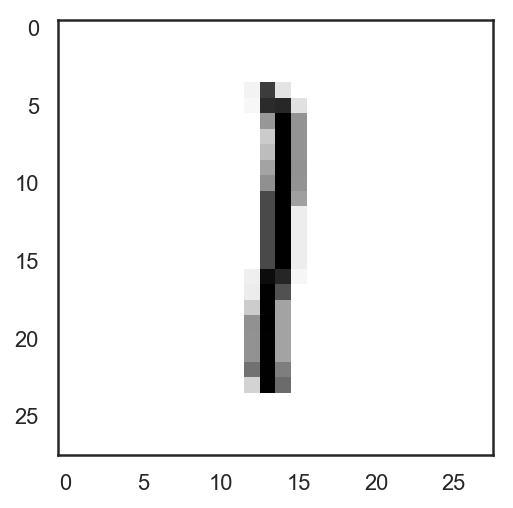

In [104]:
# We can see that the training set consists of 60,000 images of size 28x28 pixels
i=np.random.randint(0,X_train.shape[0])
sns.set_style("white")
plt.imshow(X_train[i], cmap="gray_r") ;
sns.set(style="darkgrid")
print("This digit is: " , y_train[i])

In [105]:
# Look at the data values for a couple of images
print(X_train[0].min(), X_train[1].max())

0 255


The data consists of values between 0-255 representing the **grayscale level**

In [106]:
# The labels are the digit on the image
print(y_train.shape)

(60000,)


In [107]:
# Scaling the data
# It is important to normalize the input data to (0-1) before providing it to a neural net
# We could use the previously introduced function from scikit-learn. However, here it is sufficient to
# just divide the input data by 255
X_train_norm = X_train/255.
X_test_norm = X_test/255.

# Also we need to reshape the input data such that each sample is a vector and not a 2D matrix
X_train_prep = X_train_norm.reshape(X_train_norm.shape[0],28*28)
X_test_prep = X_test_norm.reshape(X_test_norm.shape[0],28*28)

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
One-Hot encoding

In multi-class classification problems the labels are provided to the neural network as something called **One-hot encodings**. The categorical labels (0-9 here) are converted to vectors.

For the MNIST problem where the data has **10 categories** we will convert every label to a vector of length 10. 
All the entries of this vector will be zero **except** for the index which is equal to the (integer) value of the label.

For example:
if label is 4. The one-hot vector will look like **[0 0 0 0 1 0 0 0 0 0]**

Fortunately, Keras has a built-in function to achieve this and we do not have to write a code for this ourselves.
</p>
</div>

In [108]:
from keras.utils.np_utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

print(y_train_onehot.shape)

(60000, 10)


In [109]:
# Building the keras model
from keras.models import Sequential
from keras.layers import Dense

def mnist_model():
    model = Sequential()

    model.add(Dense(64, input_shape=(28*28,), activation="relu"))

    model.add(Dense(64, activation="relu"))

    model.add(Dense(10, activation="softmax"))

    model.compile(loss="categorical_crossentropy",
                  optimizer="rmsprop", metrics=["accuracy"])
    return model

model = mnist_model()

model_run = model.fit(X_train_prep, y_train_onehot, epochs=20,
                      batch_size=512)

Epoch 1/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.5699 - acc: 0.8498
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2558 - acc: 0.9263
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1982 - acc: 0.9428
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1633 - acc: 0.9528
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1375 - acc: 0.9599
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1181 - acc: 0.9657
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1037 - acc: 0.9692
Epoch 8/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0927 - acc: 0.9724
Epoch 9/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0823 - acc: 0.9757
Epoch 10/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0758 - acc: 0.977

In [110]:
print("The [loss, accuracy] on test dataset are: " , model.evaluate(X_test_prep, y_test_onehot))

10000/10000 [==============================] - 3s 274us/step
The [loss, accuracy] on test dataset are:  [0.0877833616821561, 0.9727]


### Exercise section
* Reinitialize and run the model again with validation dataset, plot the accuracy as a function of epochs, play with number of epochs and observe what is happening.

In [111]:
# Code here

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.5683 - acc: 0.8505 - val_loss: 0.3052 - val_acc: 0.9128
Epoch 2/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.2550 - acc: 0.9262 - val_loss: 0.2355 - val_acc: 0.9279
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2021 - acc: 0.9407 - val_loss: 0.1751 - val_acc: 0.9448
Epoch 4/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.1675 - acc: 0.9507 - val_loss: 0.1661 - val_acc: 0.9489
Epoch 5/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.1435 - acc: 0.9580 - val_loss: 0.1612 - val_acc: 0.9485
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1240 - acc: 0.9633 - val_loss: 0.1358 - val_acc: 0.9570
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1088 - acc: 0.9674 - val_loss: 0.1284 - val_ac

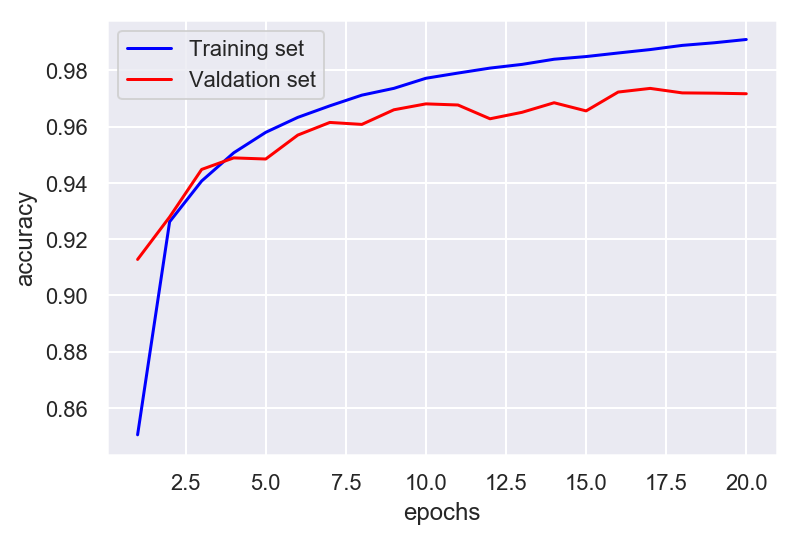

In [112]:
# Solution:
num_epochs = 20
model = mnist_model()
model_run = model.fit(X_train_prep, y_train_onehot, epochs=num_epochs,
                      batch_size=512, validation_data=(X_test_prep, y_test_onehot))
# Evaluating the model on test dataset
#print("The [loss, accuracy] on test dataset are: " , model.evaluate(X_test_prep, y_test_onehot))
history_model = model_run.history
print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(np.arange(1, num_epochs+1), history_model["acc"], color = "blue", label="Training set") ;
sns.lineplot(np.arange(1, num_epochs+1), history_model["val_acc"], color = "red", label="Valdation set") ;
plt.xlabel("epochs") ;
plt.ylabel("accuracy") ;

What we see here is **overfitting**. After the first few epochs the training and validation datasets show a similar accuracy but thereafter the network starts to over fit to the training set.

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
Keep in mind that neural networks are quite prone to overfitting so always check for it.
</p>
</div>

### Adding regularization

In [113]:
# Adding l2 regularization
# Building the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

def mnist_model():
    
    model = Sequential()

    model.add(Dense(64, input_shape=(28*28,), activation="relu", 
                   kernel_regularizer=l2(0.01)))

    model.add(Dense(64, activation="relu", 
                   kernel_regularizer=l2(0.01)))

    model.add(Dense(10, activation="softmax"))

    model.compile(loss="categorical_crossentropy",
                  optimizer="rmsprop", metrics=["accuracy"])
    return model

model = mnist_model()

num_epochs = 20
model_run = model.fit(X_train_prep, y_train_onehot, epochs=num_epochs,
                      batch_size=512, validation_data=(X_test_prep, y_test_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/step - loss: 1.5830 - acc: 0.8313 - val_loss: 1.0330 - val_acc: 0.8796
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.8571 - acc: 0.8997 - val_loss: 0.7363 - val_acc: 0.9086
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.6914 - acc: 0.9073 - val_loss: 0.6694 - val_acc: 0.8920
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.6105 - acc: 0.9121 - val_loss: 0.5905 - val_acc: 0.9062
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.5626 - acc: 0.9163 - val_loss: 0.5815 - val_acc: 0.8957
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.5282 - acc: 0.9198 - val_loss: 0.5588 - val_acc: 0.9052
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.5033 - acc: 0.9229 - val_loss: 0.5025 - val_ac

The history has the following data:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


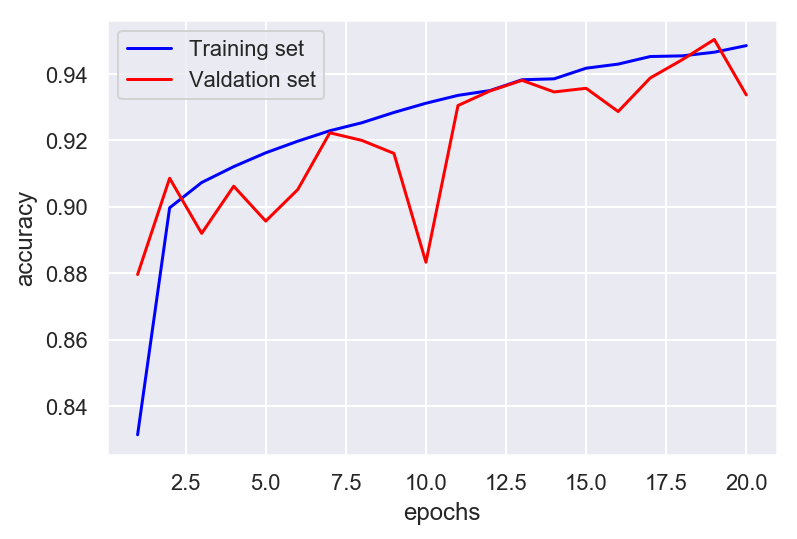

In [114]:
# Evaluating the model on test dataset
history_model = model_run.history
print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(np.arange(1, num_epochs+1), history_model["acc"], color = "blue", label="Training set") ;
sns.lineplot(np.arange(1, num_epochs+1), history_model["val_acc"], color = "red", label="Valdation set") ;
plt.xlabel("epochs") ;
plt.ylabel("accuracy") ;

<div class="alert alert-block alert-warning">
<p><i class="fa fa-warning"></i>&nbsp;
Another way to add regularization and to make the network more robust is by applying Dropout. When we add dropout to a layer a specified percentage of units in that layer are switched off. 
    
Both L2 regularization and Dropout make the model simpler and thus reducing overfitting.
</p>
</div>

### Exercise section
* Add dropout instead of L2 regularization in the network above

In [115]:
# Adding dropout is easy in keras
# We import a layer called Dropout and add as follows
# model.add(Dropout(0.2)) to randomly drop 20% of the hidden units




Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.6387 - acc: 0.8222 - val_loss: 0.2917 - val_acc: 0.9119
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2846 - acc: 0.9158 - val_loss: 0.1995 - val_acc: 0.9402
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2187 - acc: 0.9348 - val_loss: 0.1717 - val_acc: 0.9463
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1823 - acc: 0.9460 - val_loss: 0.1526 - val_acc: 0.9519
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1574 - acc: 0.9530 - val_loss: 0.1383 - val_acc: 0.9569
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1407 - acc: 0.9582 - val_loss: 0.1228 - val_acc: 0.9635
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1279 - acc: 0.9619 - val_loss: 0.1111 - val_ac

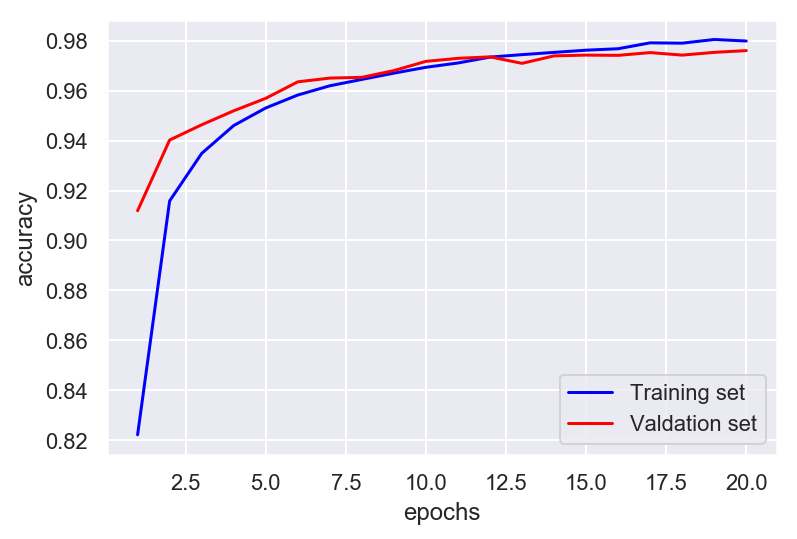

In [116]:
# Solution
# Adding Dropout
# Building the keras model
from keras.models import Sequential
from keras.layers import Dense, Dropout

def mnist_model():
    
    model = Sequential()

    model.add(Dense(64, input_shape=(28*28,), activation="relu"))
              
    model.add(Dropout(0.15))

    model.add(Dense(64, activation="relu"))
    
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="categorical_crossentropy",
                  optimizer="rmsprop", metrics=["accuracy"])
              
    return model

model = mnist_model()

num_epochs = 20
model_run = model.fit(X_train_prep, y_train_onehot, epochs=num_epochs,
                      batch_size=512, validation_data=(X_test_prep, y_test_onehot))

# Evaluating the model on test dataset
history_model = model_run.history
print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(np.arange(1, num_epochs+1), history_model["acc"], color = "blue", label="Training set") ;
sns.lineplot(np.arange(1, num_epochs+1), history_model["val_acc"], color = "red", label="Valdation set") ;
plt.xlabel("epochs") ;
plt.ylabel("accuracy") ;

## Network Architecture

The neural networks which we have seen till now are the simplest kind of neural networks.
There exist more sophisticated network architectures especially designed for specific applications.
Some of them are as follows:

###  Convolution Neural Networks (CNNs)

These networks are used mostly for computer vision like tasks such as image classification and object detection. 
One of the old CNN networks is shown below.

<center>
<figure>
<img src="./images/neuralnets/CNN_lecun.png" width="800"/>
<figcaption>source: LeCun et al., Gradient-based learning applied to document recognition (1998).</figcaption>
</figure>
</center>

CNNs consist of new type of layers such as convolution and pooling layers.

###  Recurrent Neural Networks (RNNs)

RNNs are used for problems such as time-series data, speech recognition and translation.

### Generative adversarial networks (GANs)

GANs consist of 2 parts, a generative network and a discriminative network. The generative network produces data which is then fed to the discriminative network which judges if the new data belongs to a specified dataset. Then via feedback loops the generative network becomes better and better at creating images similar to the dataset the discriminative network is judging against. At the same time the discriminative network get better and better at identifyig **fake** instances which are not from the reference dataset. 

## CNN in a bit more detail

The standard CNN srchtecture can be seen as 2 parts:

* Feature extraction
* Classification

For the **classification** part we use the denly connected network as shown in the keras examples above.

However, for the **feature extraction** part we use new types of layers called **convolution** layers

### What is a Convolution?


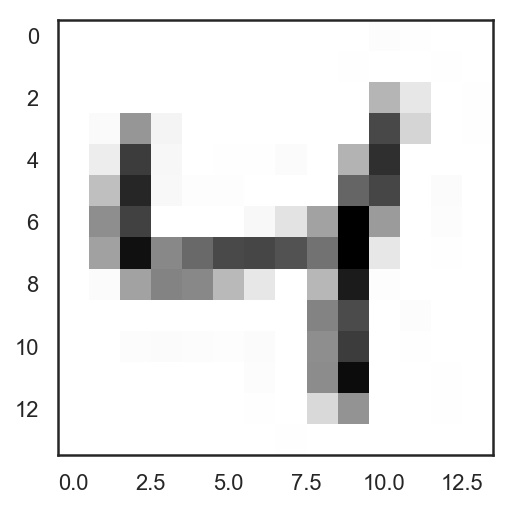

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
# Loading the train and test data
digit = np.genfromtxt("digit_4_14x14.csv", delimiter=",").astype(np.int16) ;
plt.imshow(digit, "gray_r")

This image in matrix form

In [118]:
def plot_astable(matrix, hw=0.15):
    matrix = plt.table(cellText=matrix, loc=(0,0), cellLoc='center') ;
    matrix.set_fontsize(14)
    cells=matrix.get_celld() ;
    for i in cells:
        cells[i].set_height(hw) ;
        cells[i].set_width(hw) ;
    plt.axis("off")

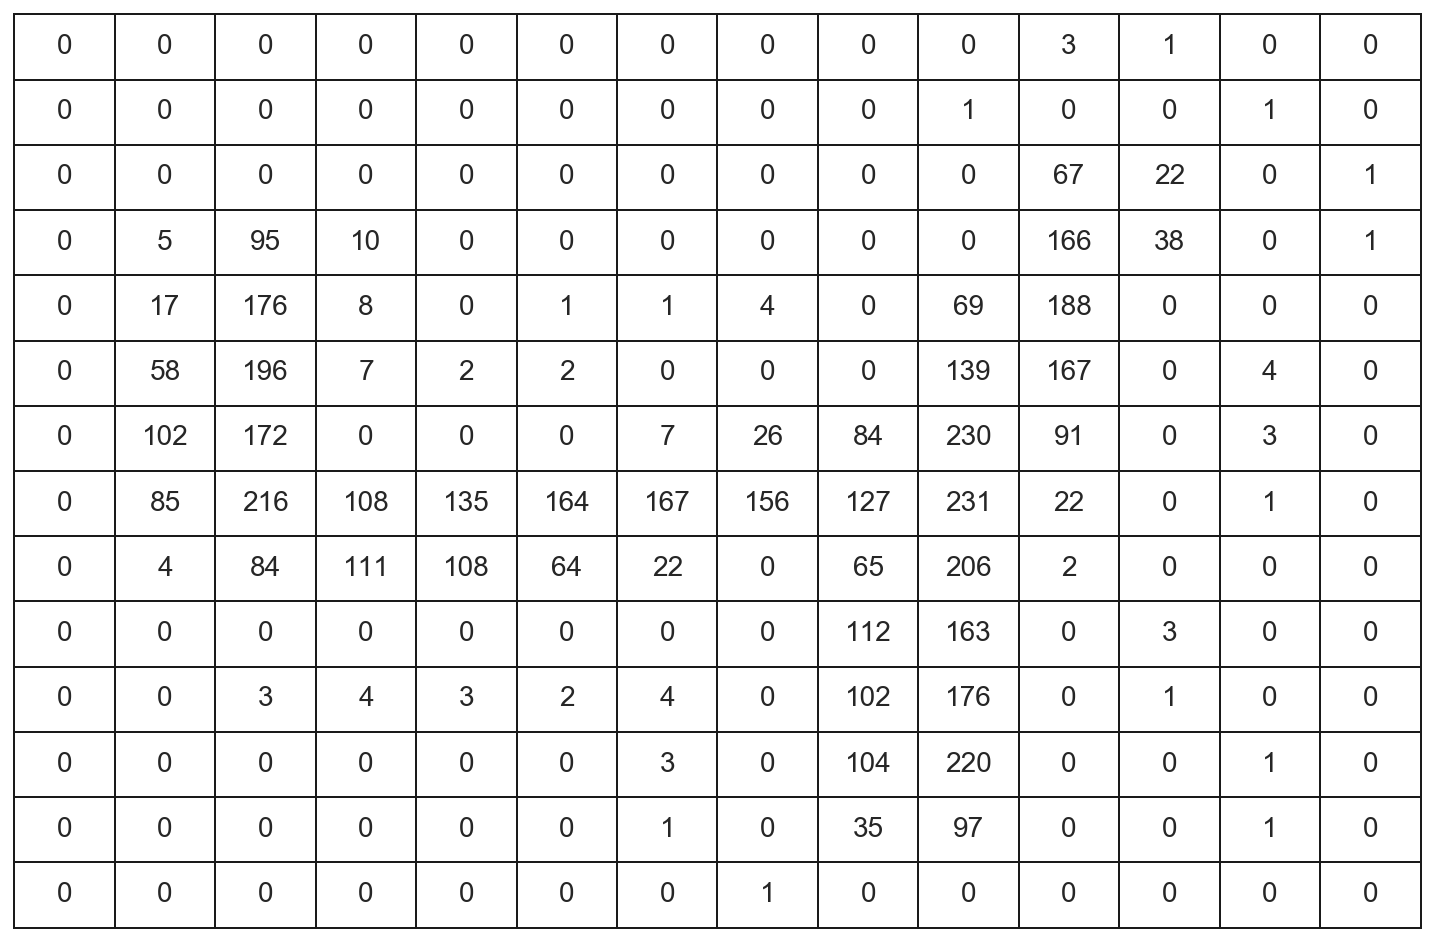

In [119]:
plot_astable(digit)

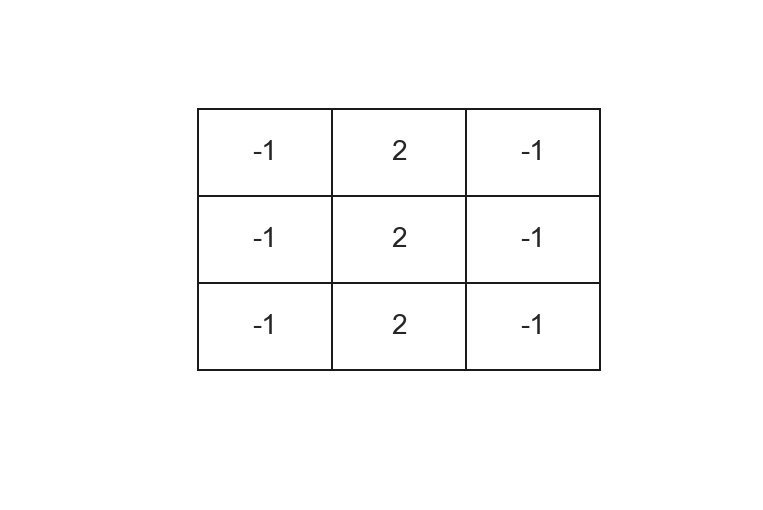

In [120]:
# Vertical edge detection
vertical_edge_kernel = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
plot_astable(vertical_edge_kernel, 0.2)

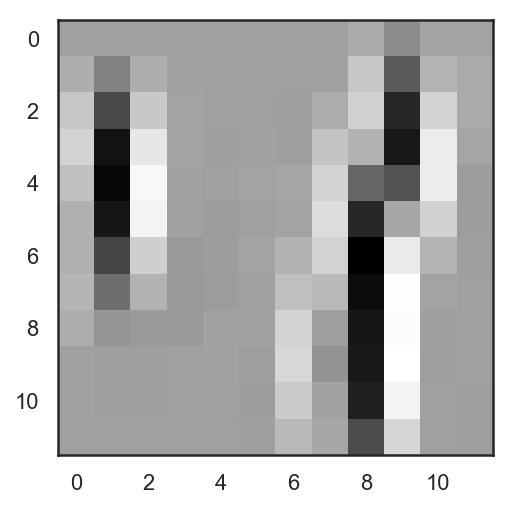

In [121]:
import numpy as np

def convolution(matrix, kernel):
    # This function computes a convolution between a matrix and a kernel/filter without any padding
    width_kernel = kernel.shape[0]
    height_kernel = kernel.shape[1]
    convolution = np.zeros((matrix.shape[0] - width_kernel + 1,
                            matrix.shape[1] - height_kernel + 1))
    for i in range(matrix.shape[0] - width_kernel + 1):
        for j in range(matrix.shape[1] - height_kernel + 1):
            convolution[i, j] = np.sum(np.multiply(
                matrix[i:i+width_kernel, j:j+height_kernel], kernel))
    return convolution


vertical_detect = convolution(digit, vertical_edge_kernel)
plt.imshow(vertical_detect, cmap="gray_r") ;

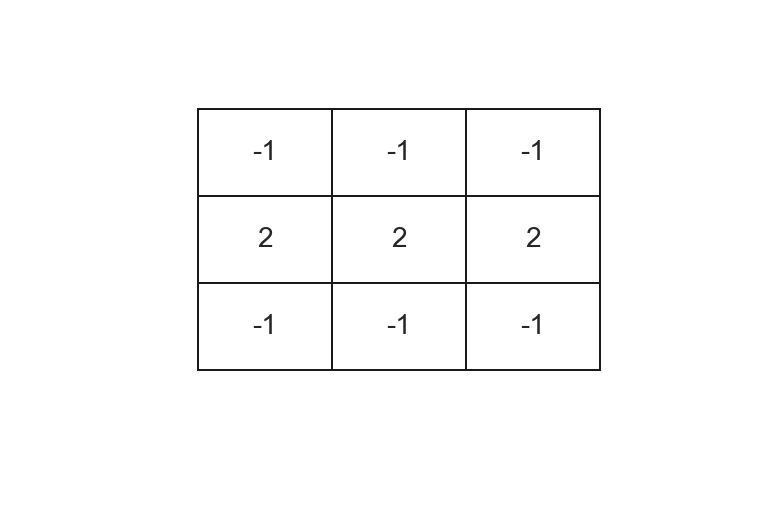

In [122]:
# Horizontal edge detection
horizontal_edge_kernel = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
plot_astable(horizontal_edge_kernel, 0.2)

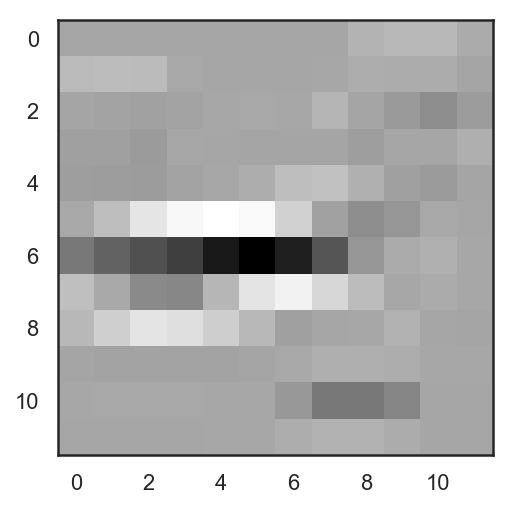

In [123]:
horizontal_detect = convolution(digit, horizontal_edge_kernel)
plt.imshow(horizontal_detect, cmap="gray_r") ;

### Maxpooling
Taking maximum in n x n sized sliding windows

In [124]:
import numpy as np
def maxpool_2x2(matrix):
    out_dim = np.array([matrix.shape[0]/2, matrix.shape[1]/2]).astype(int)
    subsample = np.zeros((out_dim))
    for i in range(out_dim[0]):
        for j in range(out_dim[1]):
            subsample[i,j] = np.max(matrix[i*2:i*2+2, j*2:j*2+2])
    return subsample

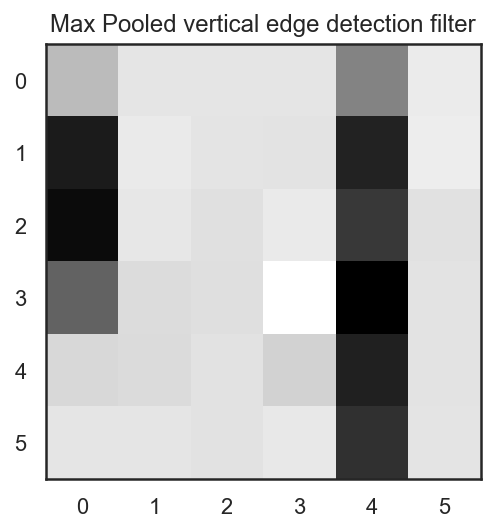

In [125]:
import matplotlib.pyplot as plt
subsampled_image = maxpool_2x2(vertical_detect)
plt.imshow(subsampled_image, cmap="gray_r")
plt.title("Max Pooled vertical edge detection filter") ;

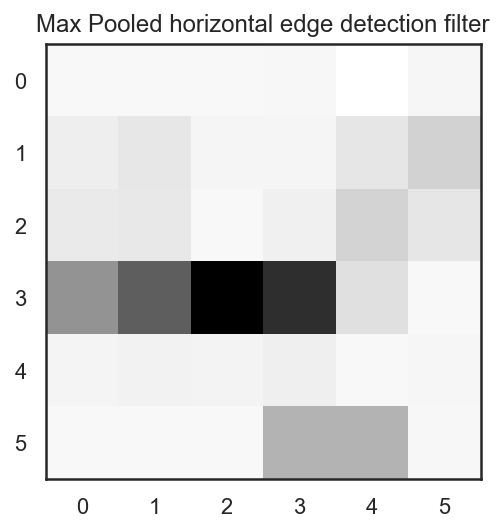

In [126]:
subsampled_image = maxpool_2x2(horizontal_detect)
plt.imshow(subsampled_image, cmap="gray_r") ;
plt.title("Max Pooled horizontal edge detection filter") ;

## Let's explore some more of such filters/kernels!!

http://setosa.io/ev/image-kernels

## CNN Examples

For this example we will work with a dataset called fashion-MNIST which is quite similar to the MNIST data above.
> Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.
source: https://github.com/zalandoresearch/fashion-mnist

The 10 classes of this dataset are:

| Label| Item |
| --- | --- |
| 0 |	T-shirt/top |
| 1	| Trouser |
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

In [127]:
# Loading the dataset in keras
# Later you can explore and play with other datasets with come with Keras
from keras.datasets import fashion_mnist

# Loading the train and test data

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

items =['T-shirt/top', 'Trouser', 
        'Pullover', 'Dress', 
        'Coat', 'Sandal', 
        'Shirt', 'Sneaker',
        'Bag', 'Ankle boot']

This item is a:  Ankle boot


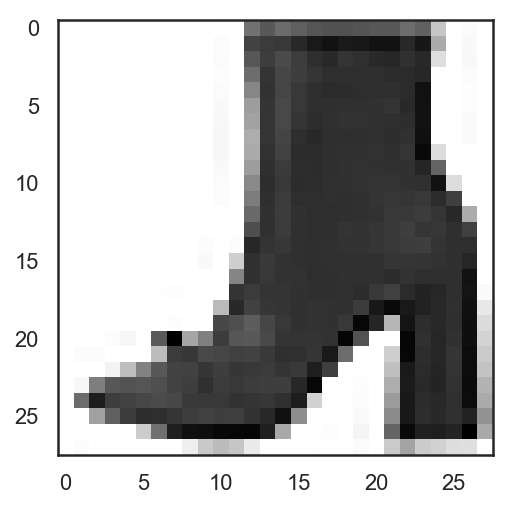

In [128]:
# We can see that the training set consists of 60,000 images of size 28x28 pixels
import matplotlib.pyplot as plt
import numpy as np
i=np.random.randint(0,X_train.shape[0])
plt.imshow(X_train[i], cmap="gray_r") ; 
print("This item is a: " , items[y_train[i]])

In [129]:
# Also we need to reshape the input data such that each sample is a 4D matrix of dimension
# (num_samples, width, height, channels). Even though these images are grayscale we need to add
# channel dimension as this is expected by the Conv function
X_train_prep = X_train.reshape(X_train.shape[0],28,28,1)/255.
X_test_prep = X_test.reshape(X_test.shape[0],28,28,1)/255.

from keras.utils.np_utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

print(y_train_onehot.shape)

(60000, 10)


In [130]:
# Creating a CNN similar to the one shown in the figure from LeCun paper
# In the original implementation Average pooling was used. However, we will use maxpooling as this 
# is what us used in the more recent architectures and is found to be a better choice
# Convolution -> Pooling -> Convolution -> Pooling -> Flatten -> Dense -> Dense -> Output layer
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

def simple_CNN():
    
    model = Sequential()
    
    model.add(Conv2D(6, (3,3), input_shape=(28,28,1), activation='relu'))
    
    model.add(MaxPool2D((2,2)))
    
    model.add(Conv2D(16, (3,3), activation='relu'))
    
    model.add(MaxPool2D((2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))
    
    model.add(Dense(84, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    
    return model

model = simple_CNN()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_304 (Dense)            (None, 120)               48120     
_________________________________________________________________
dense_305 (Dense)            (None, 84)                10164     
__________

In [131]:
num_epochs = 10
model_run = model.fit(X_train_prep, y_train_onehot, epochs=num_epochs, 
                      batch_size=64, validation_data=(X_test_prep, y_test_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 756us/step - loss: 0.5710 - acc: 0.7896 - val_loss: 0.4820 - val_acc: 0.8232
Epoch 2/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.3682 - acc: 0.8648 - val_loss: 0.4050 - val_acc: 0.8527
Epoch 3/10
60000/60000 [==============================] - 38s 630us/step - loss: 0.3175 - acc: 0.8829 - val_loss: 0.3660 - val_acc: 0.8663
Epoch 4/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.2908 - acc: 0.8921 - val_loss: 0.3247 - val_acc: 0.8808
Epoch 5/10
60000/60000 [==============================] - 39s 643us/step - loss: 0.2710 - acc: 0.9001 - val_loss: 0.3236 - val_acc: 0.8863
Epoch 6/10
60000/60000 [==============================] - 39s 650us/step - loss: 0.2541 - acc: 0.9060 - val_loss: 0.2934 - val_acc: 0.8947
Epoch 7/10
60000/60000 [==============================] - 39s 648us/step - loss: 0.2419 - acc: 0.9103 - val_loss: 0.

### Exercise section
* Use the above model or improve it (change number of filters, add more layers etc. on the MNIST example and see if you can get a better accuracy than what we achieved with a vanilla neural network)

### Exercise section
* Explore the CIFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html) dataset included with Keras and build+train a simple CNN to classify it

In [132]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()